<a href="https://colab.research.google.com/github/jawaleketan/Zomato-Data-Analysis/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


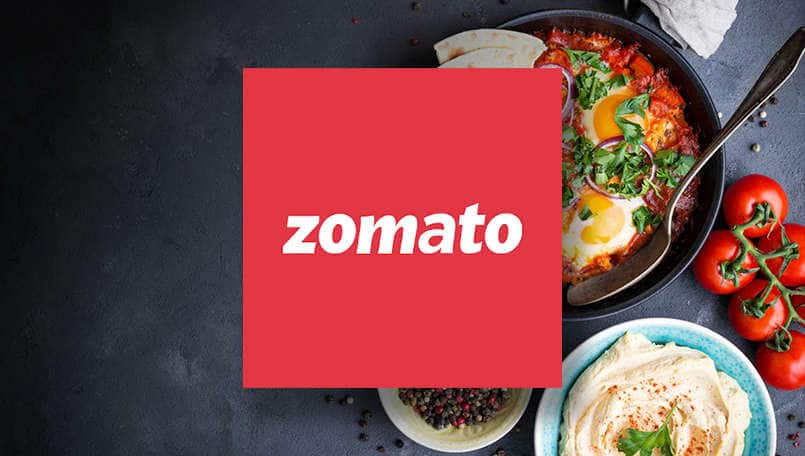
# Problem Statement

We have to answer following inquiries :

1. Distribution of Ratings
2. Distribution of Approximate Cost
3. Ratings vs. Approximate Cost
4. Online Order vs. Ratings
5. Book Table vs. Ratings
6. Restaurant Type Analysis
7. Average Rating by Restaurant Type
8. Average Cost by Restaurant Type
9. Do a greater number of restaurants provide online delivery as opposed to offline services?

# Step 1: Importing necessary Python libraries

In [29]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Step 2: Creating the data frame


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Projects/Zomato Data Analysis/Zomato-data-.csv')

In [ ]:
df

,Restaurant Name,online_order,book_table,rate,votes,approx_cost,restaurant_type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


# Step 3: Understanding the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
df.describe()

,rate,votes,approx_cost
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


### Data Understanding:

- DataFrame shape - 148 rows × 7 columns
- There is no NULL value
- In rate column we have to remove "/5" denominator
- Change column names:
    - "name" to "restaurant_name",
    - "approx_cost(for two people)" to "approx_cost",
    - "listed_in(type)" to "restaurant_type"
    


# Step 4: Data cleaning and processing

### Changing column names

In [ ]:
df = df.rename(columns={'name': 'Restaurant Name'})
df = df.rename(columns={'approx_cost(for two people)': 'approx_cost'})
df = df.rename(columns={'listed_in(type)': 'restaurant_type'})

### Clean rate column

In [ ]:
df['rate'] = df['rate'].str.replace('/5', '')
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Exploratory Data Analysis (EDA)

Let's explore the data to answer interesting questions.

### 1. Distribution of Ratings

In [33]:
fig_rate = px.histogram(df, x = 'rate', nbins = 20, title = 'Distribution of Ratings')
fig_rate.show()

#### Insights:

Max ratings (30) are received in between 3.8 and 3.9

### 2. Distribution of Approximate Cost



In [34]:
fig_cost = px.histogram(df, x = 'approx_cost', nbins = 20, title = 'Distribution of Approximate Cost')
fig_cost.show()

### Insights:

- Price 300 paid by most of the people (23).

### 3. Ratings vs. Approximate Cost


In [35]:
fig_scatter = px.scatter(df, x = 'approx_cost', y = 'rate', title = 'Ratings vs. Approximate Cost')
fig_scatter.show()

### Insights :

Good ratings (4 to 5) is given by people who paid price between 300 to 850

### 4. Online Order vs. Ratings

In [36]:
fig_online_order = px.box(df, x = 'online_order', y = 'rate',  title = 'Online Order vs. Ratings')
fig_online_order.show()

### Insights:

Customers who order online are more likely to provide good ratings

### 5. Book Table vs. Ratings

In [37]:
fig_book_table = px.box(df, x = 'book_table', y = 'rate', title = 'Book Table vs Ratings')
fig_book_table.show()

### Insights:

Customers who book table are more likely to provide good ratings

### 6. Restaurant Type Analysis

In [38]:
fig_type_count = px.bar(df['restaurant_type'].value_counts().reset_index(), x='restaurant_type', y='count', title='Count of Restaurants by Type', labels={'restaurant_type': 'Restaurant Type', 'count': 'Count'})
fig_type_count.show()

### Insights:

Most prefered restaurant type is Dining Restaurants

### 7. Average Rating by Restaurant Type

In [39]:
avg_rating_by_type = df.groupby('restaurant_type')['rate'].mean().reset_index()
fig_avg_rating = px.bar(avg_rating_by_type, x='restaurant_type', y='rate', title='Average Rating by Restaurant Type', labels={'restaurant_type': 'Restaurant Type', 'rate': 'Average Rating'})
fig_avg_rating.show()

### Insights:

There is not much difference in rating by restaurant type. Ratings are in between 3.5 and 3.9

### 8. Average Cost by Restaurant Type


In [40]:
avg_cost_by_type = df.groupby('restaurant_type')['approx_cost'].mean().reset_index()
fig_avg_cost = px.bar(avg_cost_by_type, x='restaurant_type', y='approx_cost', title='Average Cost by Restaurant Type', labels={'restaurant_type': 'Restaurant Type', 'approx_cost': 'Average Cost'})
fig_avg_cost.show()

### Insights:

High avg cost is paid by customers who chose restaurant type "Dinner" and "Other"

### 9. Do a greater number of restaurants provide online delivery as opposed to offline services?

In [41]:
online_counts = df['online_order'].value_counts().reset_index()
fig_online_delivery = px.pie(online_counts, names='online_order', values='count', title='Online Delivery vs. Offline')
fig_online_delivery.show()

### Insights:

Most of the restaurants like to provide "Offline Services"

## Conclusions

1. Max ratings (30) are received in between 3.8 and 3.9
2. Price 300 paid by most of the people (23)
3. Good ratings (4 to 5) is given by people who paid price between 300 to 850
4. Customers who order online are more likely to provide good ratings
5. Customers who book table are more likely to provide good ratings
6. Most prefered restaurant type is Dining Restaurants
7. There is not much difference in rating by restaurant type. Ratings are in between 3.5 and 3.9
8. High avg cost is paid by customers who chose restaurant type "Dinner" and "Other"
9. Most of the restaurants like to provide "Offline Services"

End of the analysis :)